<a href="https://colab.research.google.com/github/clobos/Bioestatistica_ESALQ_Python_2025/blob/main/Aula04_Bioestatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão linear simples — teoria, estimação, correlação de Pearson (com Python e dados biológicos)

## Modelo e suposições
Regressão linear simples (RLS):
$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i,\quad i=1,\ldots,n,
$$
com $\mathbb{E}[\varepsilon_i]=0$, $\mathrm{Var}(\varepsilon_i)=\sigma^2$ (homocedasticidade) e independência. Sob normalidade $\varepsilon_i\sim\mathcal N(0,\sigma^2)$, os MQO coincidem com os MLEs; sem normalidade, MQO é BLUE (Gauss–Markov).

## Estimação por mínimos quadrados ordinários (MQO)
Notação matricial $\mathbf{X}=\begin{bmatrix}\mathbf{1}&\mathbf{x}\end{bmatrix}\$:

$$
\hat{\boldsymbol\beta} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y},
\qquad
\mathrm{Var}(\hat{\boldsymbol\beta}) = \sigma^2 (\mathbf{X}^\top \mathbf{X})^{-1}.
$$

Forma escalar (com $\bar x, \bar y$ e somas de quadrados):
$$
S_{xx}=\sum_{i=1}^n (x_i-\bar x)^2,\quad
S_{xy}=\sum_{i=1}^n (x_i-\bar x)(y_i-\bar y),\quad
S_{yy}=\sum_{i=1}^n (y_i-\bar y)^2.
$$
Estimadores fechados:
$$
\hat\beta_1=\frac{S_{xy}}{S_{xx}},\qquad
\hat\beta_0=\bar y-\hat\beta_1\,\bar x.
$$

**Resíduos e variância do erro.** Resíduos $e_i=y_i-\hat y_i$ com $\hat y_i=\hat\beta_0+\hat\beta_1 x_i$.  
$$
\mathrm{RSS}=\sum_{i=1}^n e_i^2,\qquad
\hat\sigma^2=\frac{\mathrm{RSS}}{n-2}.
$$
**Erros-padrão:**
$$
\mathrm{SE}(\hat\beta_1)=\sqrt{\frac{\hat\sigma^2}{S_{xx}}},\qquad
\mathrm{SE}(\hat\beta_0)=\sqrt{\hat\sigma^2\!\left(\frac{1}{n}+\frac{\bar x^2}{S_{xx}}\right)}.
$$
Sob normalidade:
$$
\frac{\hat\beta_j-\beta_j}{\mathrm{SE}(\hat\beta_j)}\sim t_{n-2},\quad j\in\{0,1\}.
$$

**Decomposição e $R^2$.**
$$
\mathrm{TSS}=\sum (y_i-\bar y)^2,\quad
\mathrm{ESS}=\sum (\hat y_i-\bar y)^2,\quad
\mathrm{RSS}=\sum (y_i-\hat y_i)^2,\quad
\mathrm{TSS}=\mathrm{ESS}+\mathrm{RSS},\quad
R^2=1-\frac{\mathrm{RSS}}{\mathrm{TSS}}.
$$

## Inferência e predição
Para $x_0$:
$$
\hat y(x_0)=\hat\beta_0+\hat\beta_1 x_0,
\quad
\mathrm{SE}_{\text{média}}(x_0)=\sqrt{\hat\sigma^2\!\left(\frac{1}{n}+\frac{(x_0-\bar x)^2}{S_{xx}}\right)},
$$
$$
\mathrm{SE}_{\text{pred}}(x_0)=\sqrt{\hat\sigma^2\!\left(1+\frac{1}{n}+\frac{(x_0-\bar x)^2}{S_{xx}}\right)}.
$$
Intervalos:
$$
\text{IC da média: }\ \hat y(x_0)\pm t_{n-2,\,1-\alpha/2}\,\mathrm{SE}_{\text{média}}(x_0),\qquad
\text{IP: }\ \hat y(x_0)\pm t_{n-2,\,1-\alpha/2}\,\mathrm{SE}_{\text{pred}}(x_0).
$$

## Diagnóstico: matriz chapéu, alavancagem e resíduos
Matriz chapéu:
$$
\mathbf{H}=\mathbf{X}(\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top,\quad
\mathbf{e}=\mathbf{y}-\hat{\mathbf{y}}=(\mathbf{I}-\mathbf{H})\mathbf{y}.
$$
Alavancagem $h_{ii}=[\mathbf{H}]_{ii}$. Regra prática: $h_{ii}>2p/n$ (ou $3p/n$), com $p$ parâmetros (na RLS, $p=2$).

**Resíduos studentizados.**
$$
r_i^{(\text{int})}=\frac{e_i}{\hat\sigma\sqrt{1-h_{ii}}}\quad(\text{interno}),$$
$$
t_i=\frac{e_i}{\hat\sigma_{(i)}\sqrt{1-h_{ii}}}\quad(\text{externo}),
$$
onde $\hat\sigma_{(i)}$ é estimada sem o ponto $i$.

**Distância de Cook (influência).**
$$
D_i=\frac{e_i^2}{p\,\hat\sigma^2}\cdot\frac{h_{ii}}{(1-h_{ii})^2}
=\frac{t_i^{\,2}}{p}\cdot\frac{h_{ii}}{1-h_{ii}}.
$$
Regra prática: $D_i>4/n$ sugere influência elevada.

## Correlação de Pearson e ligação com a RLS
Correlação amostral:
$$
r=\frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}\in[-1,1].
$$
Na RLS com intercepto:
$$
\hat\beta_1=r\,\frac{s_y}{s_x},\qquad R^2=r^2,
$$
com $s_x^2=S_{xx}/(n-1)$ e $s_y^2=S_{yy}/(n-1)$.  
$r=0$ indica ausência de **associação linear** (pode haver não linearidade).

## Outros métodos (panorama)
Sob normalidade, MLE = MQO. Alternativas: estimadores robustos (Huber, Tukey), LAD/L1, TLS (erro em X e Y), regularização (ridge, lasso).

## Referências
- Montgomery, D. C., Peck, E. A., & Vining, G. G. (2021). *Introduction to Linear Regression Analysis* (6th ed.). Wiley.  
- Cook, R. D., & Weisberg, R. (1982). *Residuals and Influence in Regression*. Chapman & Hall.  
- Belsley, D. A., Kuh, E., & Welsch, R. E. (1980). *Regression Diagnostics*. Wiley.  
- Fox, J. (2016). *Applied Regression Analysis and GLMs* (3rd ed.). Sage.  
- Seber, G. A. F., & Lee, A. J. (2012). *Linear Regression Analysis* (2nd ed.). Wiley.  
- NIST/SEMATECH *e-Handbook of Statistical Methods* (capítulos de regressão e diagnóstico).


# Importação das bibliotecas a serem usadas



In [21]:
import sys, subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

# Garante scipy e statsmodels (geralmente já existem no Colab)
try:
    import scipy.stats as st
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "scipy"])
    import scipy.stats as st

try:
    import statsmodels.api as sm
except Exception:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "statsmodels"])
    import statsmodels.api as sm


# SIMULAÇÃO DE DADOS (BIOLOGIA)


In [22]:
np.random.seed(42)
n = 80

# "x" = dose de fertilizante NPK (g por vaso), criativamente variada
dose = np.random.uniform(0, 10, size=n)

# Variáveis categóricas adicionais (enriquecem o CSV)
variedades = np.random.choice(["Roma", "Cereja", "Caqui", "Santa Clara"], size=n, p=[0.25, 0.35, 0.20, 0.20])
estufa = np.random.choice(["A", "B"], size=n)
id_planta = np.arange(1, n+1)

# Modelo verdadeiro: altura (cm) após 30 dias
beta0_true = 15.0
beta1_true = 2.5
sigma_true = 3.0
altura = beta0_true + beta1_true * dose + np.random.normal(0, sigma_true, size=n)

df = pd.DataFrame({
    "id_planta": id_planta,
    "estufa": estufa,
    "variedade": variedades,
    "dose_fertilizante_g": dose,
    "altura_cm": altura
})

csv_path = "biologia_regressao.csv"
df.to_csv(csv_path, index=False)
print(f"CSV salvo em: {csv_path}")
display(df.head())

CSV salvo em: biologia_regressao.csv


,id_planta,estufa,variedade,dose_fertilizante_g,altura_cm
0,1,B,Santa Clara,3.745401,22.323429
1,2,A,Caqui,9.507143,39.464619
2,3,B,Cereja,7.319939,34.179066
3,4,B,Roma,5.986585,27.823408
4,5,B,Cereja,1.560186,24.497790


In [23]:
X = sm.add_constant(df["dose_fertilizante_g"].values)
model = sm.OLS(df["altura_cm"].values, X).fit()
print("Parâmetros (const, dose):", model.params)
print(model.summary())  # resumo completo



Parâmetros (const, dose): [15.82667074  2.40829786]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     470.3
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           9.06e-35
Time:                        19:59:30   Log-Likelihood:                -200.85
No. Observations:                  80   AIC:                             405.7
Df Residuals:                      78   BIC:                             410.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


# 4) PREDIÇÕES PARA ALGUNS VALORES DE x

In [24]:
def prever_ols_simples(results_ols, x0):
    """
    Predições em x0: média prevista, IC da média e intervalo de predição.
    Usa t-Student com df=n-2 (SciPy). Caso SciPy indisponível, usa 1.96 (aprox. Normal).
    """
    x0 = np.asarray(x0, dtype=float)
    n = results_ols.nobs
    xbar = results_ols.model.exog[:, 1].mean()  # Mean of the independent variable (excluding constant)
    Sxx = np.sum((results_ols.model.exog[:, 1] - xbar)**2) # Sum of squares of x (excluding constant)
    b0 = results_ols.params[0]
    b1 = results_ols.params[1]

    medias = b0 + b1 * x0

    # Calculate SE for mean and prediction
    sigma2_hat = results_ols.mse_resid
    SE_mean = np.sqrt(sigma2_hat * (1/n + (x0 - xbar)**2 / Sxx))
    SE_pred = np.sqrt(sigma2_hat * (1 + 1/n + (x0 - xbar)**2 / Sxx))

    # Get t-critical value (assuming normal errors for simplicity if t distribution is not strictly needed or for approximation)
    # Using SciPy for t-distribution if available
    #alpha = 0.05
    #df = n - 2
    #try:
    #    t_crit = st.t.ppf(1 - alpha/2, df)
    #except Exception:
    #    t_crit = 1.96 # Approximate with normal distribution if scipy.stats is not available

    # Calculate Confidence and Prediction Intervals
    #ic_media_lower = medias - t_crit * SE_mean
    #ic_media_upper = medias + t_crit * SE_mean
    #ip_lower = medias - t_crit * SE_pred
    #ip_upper = medias + t_crit * SE_pred


    out = pd.DataFrame({
        "x0": x0,
        "y_hat": medias
     #   "IC_media_lower": ic_media_lower,
     #   "IC_media_upper": ic_media_upper,
     #   "IP_lower": ip_lower,
     #   "IP_upper": ip_upper
    })
    return out

In [25]:
x0_vals = np.array([0, 2.5, 5.0, 7.5, 10.0])
res = prever_ols_simples(model, x0_vals)
print(res)

     x0      y_hat
0   0.0  15.826671
1   2.5  21.847415
2   5.0  27.868160
3   7.5  33.888905
4  10.0  39.909649


# 5) GRÁFICO: DISPERSÃO + RETA AJUSTADA

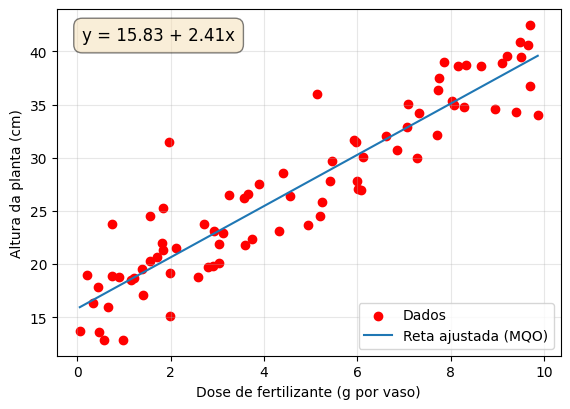

In [26]:
plt.figure(figsize=(6.5,4.5))
plt.scatter(df["dose_fertilizante_g"], df["altura_cm"], label="Dados", color="red")
x_plot = np.linspace(df["dose_fertilizante_g"].min(), df["dose_fertilizante_g"].max(), 200)
y_plot = model.params[0] + model.params[1] * x_plot
plt.plot(x_plot, y_plot, label="Reta ajustada (MQO)")

# Add the equation of the line
equation = f'y = {model.params[0]:.2f} + {model.params[1]:.2f}x'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.xlabel("Dose de fertilizante (g por vaso)")
plt.ylabel("Altura da planta (cm)")
plt.title("")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [27]:
r_numpy = np.corrcoef(df["dose_fertilizante_g"], df["altura_cm"])[0,1]
print(f"r (NumPy)   = {r_numpy:.3f}")

r (NumPy)   = 0.926


# 7) DEMONSTRAÇÃO GRÁFICA: r=1, r=-1, r≈0

In [28]:
m = 50
x_demo = np.linspace(0, 1, m)


# r = +1 (reta crescente sem ruído)

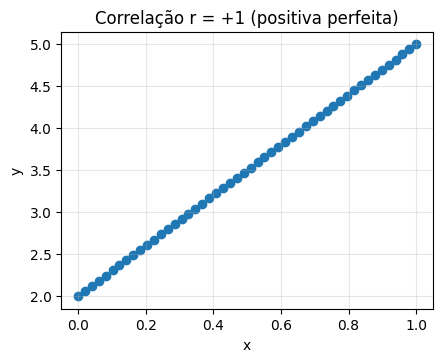

r=+1 (exato):


In [29]:
y_pos = 2 + 3 * x_demo
plt.figure(figsize=(4.8,3.6))
plt.scatter(x_demo, y_pos)
plt.title("Correlação r = +1 (positiva perfeita)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.show()
print("r=+1 (exato):")

# r = -1 (reta decrescente sem ruído)

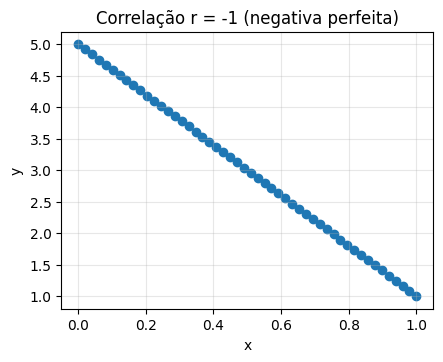

r=-1 (exato):


In [30]:
y_neg = 5 - 4 * x_demo
plt.figure(figsize=(4.8,3.6))
plt.scatter(x_demo, y_neg)
plt.title("Correlação r = -1 (negativa perfeita)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.show()
print("r=-1 (exato):")

# r ≈ 0 (sem associação linear)

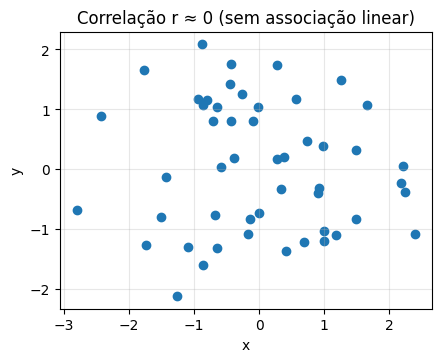

r≈0 (simulado):


In [31]:
np.random.seed(123)
x_zero = np.random.normal(0, 1, size=m)
y_zero = np.random.normal(0, 1, size=m)
plt.figure(figsize=(4.8,3.6))
plt.scatter(x_zero, y_zero)
plt.title("Correlação r ≈ 0 (sem associação linear)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)
plt.show()
print("r≈0 (simulado):")


# Como definir uma função em Python

In [32]:
def criar_funcao_linear(a, b):
  """
  Cria uma função linear y = a*x + b com os parâmetros 'a' e 'b' fornecidos.

  Args:
    a: O coeficiente angular da reta.
    b: O coeficiente linear (intercepto) da reta.

  Returns:
    Uma função lambda que representa a função linear.
  """
  return lambda x: a * x + b

# Exemplo de uso:
# Crie uma função linear com a=2 e b=5
minha_funcao = criar_funcao_linear(2, 5)
print(minha_funcao)


<function criar_funcao_linear.<locals>.<lambda> at 0x7dc84cb5fd80>


In [33]:
# Calcule o valor de y para um dado x (por exemplo, x=3)
y_resultante = minha_funcao(3)
print(f"Para x = 3, y = {y_resultante}")

Para x = 3, y = 11


In [34]:
# Solicite ao usuário que insira os valores de 'a' e 'b'
try:
  a = float(input("Digite o valor de 'a': "))
  b = float(input("Digite o valor de 'b': "))
  print(f"Você definiu a função linear: y = {a}x + {b}")
except ValueError:
  print("Entrada inválida. Por favor, digite números para 'a' e 'b'.")

Digite o valor de 'a': 2
Digite o valor de 'b': 3
Você definiu a função linear: y = 2.0x + 3.0


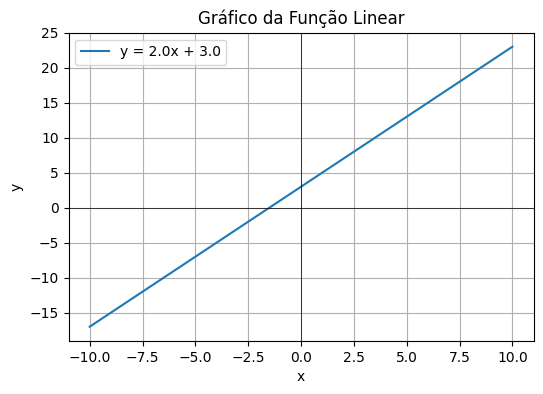

In [35]:
# Crie a função linear usando a função definida anteriormente
funcao_plot = criar_funcao_linear(a, b)

# Gere valores de x para o gráfico
x_vals = np.linspace(-10, 10, 100)

# Calcule os valores de y correspondentes
y_vals = funcao_plot(x_vals)

# Plote a função linear
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label=f'y = {a}x + {b}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico da Função Linear')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

# Não será avaliado na prova

Gere dois conjuntos de dados para ajustar os parâmetros de um modelo de Malthus e um modelo Verhulst na área de ecologia de populações. Faça o gráfico de dispersão de cada um desses modelos e insira no gráfico a curva ajustada.

## Gerar dados para o modelo de malthus

### Subtask:
Simular dados de tamanho populacional ao longo do tempo seguindo um crescimento exponencial (modelo de Malthus) com algum ruído aleatório.


**Reasoning**:
Simulate population size data following an exponential growth model with random noise and store it in a pandas DataFrame.



In [36]:
# 1. Defina parâmetros
n_inicial = 100  # Tamanho inicial da população
taxa_crescimento = 0.1   # Taxa de crescimento intrínseca
n_pontos = 50      # Número de pontos no tempo
tempo_final = 20     # Tempo final

# 2. Gere a série temporal
tempo = np.linspace(0, tempo_final, n_pontos)

# 3. Calcule o tamanho populacional teórico (Modelo de Malthus)
populacao_teorica = n_inicial * np.exp(taxa_crescimento * tempo)

# 4. Adicione ruído aleatório
np.random.seed(42) # para reprodutibilidade
ruido = np.random.normal(0, 15, size=n_pontos) # ruído gaussiano com desvio padrão de 15
populacao_observada = populacao_teorica + ruido

# Garanta que os valores observados sejam não negativos
populacao_observada[populacao_observada < 0] = 0


# 5. Crie um DataFrame
df_malthus = pd.DataFrame({
    "Tempo": tempo,
    "Tamanho_Populacao": populacao_observada
})

display(df_malthus.head())

,Tempo,Tamanho_Populacao
0,0.000000,107.450712
1,0.408163,102.092112
2,0.816327,118.221042
3,1.224490,135.871593
4,1.632653,114.222600


## Estimar parâmetros do modelo de malthus

### Subtask:
Ajustar um modelo exponencial aos dados gerados para estimar a taxa de crescimento intrínseca. Isso pode ser feito linearizando o modelo (tomando o logaritmo) e usando regressão linear, ou usando regressão não linear.


**Reasoning**:
Apply a logarithmic transformation to the 'Tamanho_Populacao' column and then fit a linear regression model to estimate the parameters for the Malthus model.



In [37]:
df_malthus['log_Tamanho_Populacao'] = np.log(df_malthus['Tamanho_Populacao'])

# Adjust linear model
X = sm.add_constant(df_malthus['Tempo']) # independent variable
y = df_malthus['log_Tamanho_Populacao'] # dependent variable
model_linear = sm.OLS(y, X).fit()

# Extract parameters
intercept_estimated = model_linear.params[0]
slope_estimated = model_linear.params[1]

# Estimate initial population and growth rate
N0_estimated = np.exp(intercept_estimated)
taxa_crescimento_estimada = slope_estimated

# Print estimated values
print("=== Parâmetros estimados para o Modelo de Malthus (Linearização) ===")
print(f"Tamanho Populacional Inicial Estimado (N0): {N0_estimated:.3f}")
print(f"Taxa de Crescimento Intrínseca Estimada (r): {taxa_crescimento_estimada:.3f}")

=== Parâmetros estimados para o Modelo de Malthus (Linearização) ===
Tamanho Populacional Inicial Estimado (N0): 100.748
Taxa de Crescimento Intrínseca Estimada (r): 0.098


/tmp/ipython-input-3269286419.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_estimated = model_linear.params[0]
/tmp/ipython-input-3269286419.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope_estimated = model_linear.params[1]


## Gerar gráfico para o modelo de malthus

### Subtask:
Criar um gráfico de dispersão dos dados simulados e adicionar a curva exponencial ajustada.


**Reasoning**:
Create a scatter plot of the observed data and add the fitted exponential curve to the plot.



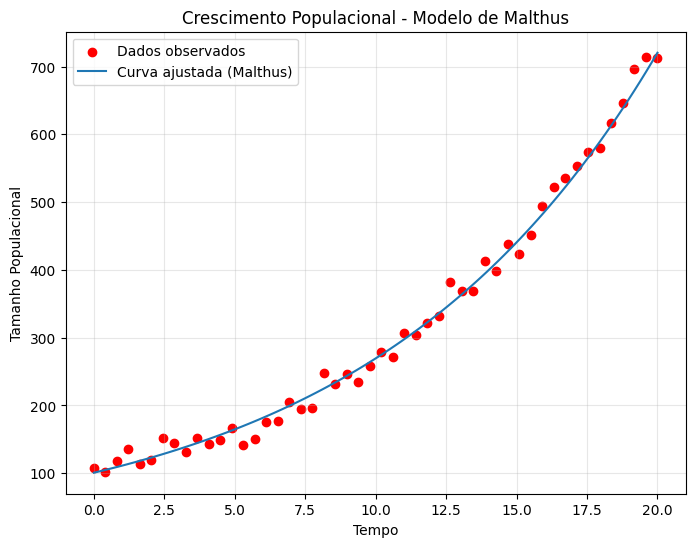

In [38]:
# 1. Create a figure and axes
fig, ax = plt.figure(figsize=(8, 6)), plt.axes()

# 2. Create a scatter plot of the observed data
ax.scatter(df_malthus['Tempo'], df_malthus['Tamanho_Populacao'], label="Dados observados", color="red")

# 3. Generate time values for the fitted curve
tempo_para_curva = np.linspace(df_malthus['Tempo'].min(), df_malthus['Tempo'].max(), 100)

# 4. Calculate the estimated population values for the fitted curve
populacao_estimada = N0_estimated * np.exp(taxa_crescimento_estimada * tempo_para_curva)

# 5. Plot the fitted exponential curve
ax.plot(tempo_para_curva, populacao_estimada, label="Curva ajustada (Malthus)")

# 6. Add labels to the axes
ax.set_xlabel("Tempo")
ax.set_ylabel("Tamanho Populacional")

# 7. Add a title to the plot
ax.set_title("Crescimento Populacional - Modelo de Malthus")

# 8. Add a legend to the plot
ax.legend()

# 9. Add a grid to the plot
ax.grid(alpha=0.3)

# 10. Display the plot
plt.show()

## Gerar dados para o modelo de verhulst

### Subtask:
Simular dados de tamanho populacional ao longo do tempo seguindo um crescimento logístico (modelo de Verhulst), incluindo a capacidade de suporte do ambiente e algum ruído aleatório.


**Reasoning**:
Define the parameters for the Verhulst model simulation and generate the time series and theoretical population values.



In [39]:
# 1. Defina os parâmetros para a simulação do modelo de Verhulst
n_inicial_verhulst = 10  # Tamanho inicial da população
taxa_crescimento_verhulst = 0.5   # Taxa de crescimento intrínseca
capacidade_suporte = 500 # Capacidade de suporte do ambiente
n_pontos_verhulst = 100      # Número de pontos no tempo
tempo_final_verhulst = 50     # Tempo final

# 2. Gere uma série temporal
tempo_verhulst = np.linspace(0, tempo_final_verhulst, n_pontos_verhulst)

# 3. Calcule o tamanho populacional teórico (Modelo de Verhulst)
populacao_teorica_verhulst = capacidade_suporte * n_inicial_verhulst / (n_inicial_verhulst + (capacidade_suporte - n_inicial_verhulst) * np.exp(-taxa_crescimento_verhulst * tempo_verhulst))

# 4. Adicione ruído aleatório
np.random.seed(42) # para reprodutibilidade
ruido_verhulst = np.random.normal(0, 20, size=n_pontos_verhulst) # ruído gaussiano com desvio padrão de 20
populacao_observada_verhulst = populacao_teorica_verhulst + ruido_verhulst

# 5. Garanta que os valores de população observados sejam não negativos
populacao_observada_verhulst[populacao_observada_verhulst < 0] = 0

# 6. Crie um DataFrame pandas
df_verhulst = pd.DataFrame({
    "Tempo": tempo_verhulst,
    "Tamanho_Populacao": populacao_observada_verhulst
})

# 7. Exiba as primeiras linhas do DataFrame resultante
display(df_verhulst.head())

,Tempo,Tamanho_Populacao
0,0.000000,19.934283
1,0.505051,10.033897
2,1.010101,29.309526
3,1.515152,51.318895
4,2.020202,21.849271


## Estimar parâmetros do modelo de verhulst

### Subtask:
Ajustar um modelo logístico (não linear) aos dados gerados para estimar a taxa de crescimento e a capacidade de suporte. Isso geralmente requer métodos de otimização para regressão não linear.


**Reasoning**:
Import the necessary function for curve fitting and define the logistic model function.



In [40]:
from scipy.optimize import curve_fit

def verhulst_model(t, K, r):
    """
    Logistic growth model (Verhulst).

    Args:
        t: Time.
        K: Carrying capacity.
        r: Intrinsic growth rate.

    Returns:
        Population size at time t.
    """
    N0 = df_verhulst["Tamanho_Populacao"].iloc[0] # Use the first observed value as initial population
    return K * N0 / (N0 + (K - N0) * np.exp(-r * t))


**Reasoning**:
Fit the defined logistic model to the generated data and extract the estimated parameters.



In [41]:
# Use curve_fit to fit the Verhulst model to the data
# Provide initial guesses for K and r
# Initial guess for K can be the maximum population observed
# Initial guess for r can be estimated from the Malthus growth phase or simply a small positive value
initial_guess = [df_verhulst["Tamanho_Populacao"].max(), 0.1]

params_verhulst, covariance = curve_fit(verhulst_model, df_verhulst["Tempo"], df_verhulst["Tamanho_Populacao"], p0=initial_guess)

# Extract the estimated parameters
K_estimated = params_verhulst[0]
r_estimated = params_verhulst[1]

# Print the estimated parameters
print("\n=== Parâmetros estimados para o Modelo de Verhulst (Regressão Não Linear) ===")
print(f"Capacidade de Suporte Estimada (K): {K_estimated:.3f}")
print(f"Taxa de Crescimento Intrínseca Estimada (r): {r_estimated:.3f}")


=== Parâmetros estimados para o Modelo de Verhulst (Regressão Não Linear) ===
Capacidade de Suporte Estimada (K): 500.874
Taxa de Crescimento Intrínseca Estimada (r): 0.406


## Gerar gráfico para o modelo de verhulst

### Subtask:
Criar um gráfico de dispersão dos dados simulados e adicionar a curva logística ajustada.


**Reasoning**:
Create a scatter plot of the simulated data and add the fitted logistic curve, as well as labels, title, legend, and grid.



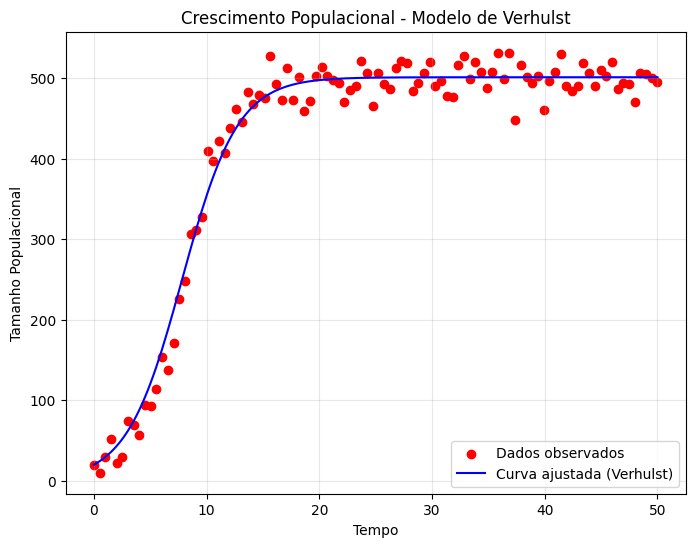

In [42]:
# 1. Crie uma figura e eixos para o gráfico usando matplotlib.pyplot.
plt.figure(figsize=(8, 6))

# 2. Crie um gráfico de dispersão dos dados de população observados
plt.scatter(df_verhulst['Tempo'], df_verhulst['Tamanho_Populacao'], label="Dados observados", color="red")

# 3. Gere uma sequência de valores de tempo para a curva ajustada
tempo_para_curva_verhulst = np.linspace(df_verhulst['Tempo'].min(), df_verhulst['Tempo'].max(), 200)

# 4. Calcule os valores de população estimados para a curva ajustada
populacao_estimada_verhulst = verhulst_model(tempo_para_curva_verhulst, K_estimated, r_estimated)

# 5. Plote a curva logística ajustada
plt.plot(tempo_para_curva_verhulst, populacao_estimada_verhulst, label="Curva ajustada (Verhulst)", color="blue")

# 6. Adicione rótulos adequados para os eixos x e y
plt.xlabel("Tempo")
plt.ylabel("Tamanho Populacional")

# 7. Adicione um título ao gráfico
plt.title("Crescimento Populacional - Modelo de Verhulst")

# 8. Adicione uma legenda ao gráfico
plt.legend()

# 9. Adicione uma grade ao gráfico
plt.grid(alpha=0.3)

# 10. Exiba o gráfico
plt.show()

## Summary:

### Data Analysis Key Findings

*   For the Malthus model, the estimated initial population size was approximately 100.748, and the estimated intrinsic growth rate was approximately 0.098, obtained through linearizing the model and using linear regression.
*   The plot for the Malthus model shows that the fitted exponential curve closely follows the trend of the simulated data, which exhibits exponential growth with some noise.
*   For the Verhulst model, the estimated carrying capacity was approximately 500.874, and the estimated intrinsic growth rate was approximately 0.406, obtained by fitting a non-linear logistic model using `scipy.optimize.curve_fit`.
*   The plot for the Verhulst model shows the simulated data points following a logistic growth pattern, leveling off around the estimated carrying capacity, and the fitted logistic curve accurately represents this trend.

### Insights or Next Steps

*   The fitting process successfully estimated the key parameters for both the Malthus and Verhulst models from simulated data, demonstrating the applicability of these methods for analyzing population growth patterns.
*   Further analysis could involve comparing the goodness-of-fit for each model to determine which better describes a given real-world population dataset, considering factors like the presence of environmental limitations.
